<a href="https://colab.research.google.com/github/marcosfs2006/rede-rpps/blob/master/Fluxo_VarreSai-2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--

<img src="https://drive.google.com/uc?id=1kPqSyZUHR_CxjN8MdQXI3nfOtcRqE_Le" alt="REDE RPPS" height="62" width="52">

-->

<center>

# <font color="orange">**ANÁLISE DE FLUXO ATUARIAL <br> GERAÇÃO ATUAL | CIVIL | PREVIDENCIÁRIO**</font>

**Última modificação: 08/01/2020**

</center>



<br>

---

# **INDENTIFICAÇÃO DO FLUXO ATUARIAL**

---

<br>

Os campos abaixo servem para colher informações sobre o fluxo atuarial a ser objeto de análise:

<br>

**<u>IMPORTANTE</u>**: Os arquivos contendo o fluxo atuarial (informado na célula a seguir) e a base de dados contendo os dados do DRAA (**`Valores_Compromissos.csv`**) devem ser carregados neste notebook para a execução das análises.

**<u>DICA</u>**: Após inserir os dados solicitados abaixo, e carregar os dados necessários, tecle **Crtl+F9** para executar todas as células do notebook.

In [0]:
#@title **Informe o nome do arquivo contendo o fluxo atuarial**
NOME_ARQUIVO <- "2019_FLX_CIVIL_PREV_GA_39217831000155.csv" #@param {type: "string"}
#@markdown ---

#@markdown <br>

#@markdown **Definição do ente e ano do DRAA correspondente ao Fluxo Atuarial em exame**
ENTE <- "Varre-Sai" #@param {type: "string"}
UF   <- "RJ" #@param ["AC", "AL", "AP", "AM", "BA", "CE", "DF", "ES", "GO", "MA", "MT", "MS", "MG", "PA", "PB", "PR", "PE", "PI", "RJ", "RN", "RS", "RO", "RR", "SC", "SP", "SE", "TO"] {allow-input: true}
ANO_DRAA  <-  "2019"  #@param ['2020', '2019', '2018', '2017', '2016', '2015']    

# Corrige encoding
ENTE <- iconv(ENTE, from="latin1", to="utf8")
# Imprime valores para conferência
NOME_ARQUIVO
ENTE
UF
ANO_DRAA

[1] "2019_FLX_CIVIL_PREV_GA_39217831000155.csv"

[1] "Varre-Sai"

[1] "RJ"

[1] "2019"

<br>

---

# **PARTE I - ANÁLISE DE RAZOABILIDADE**

---

<br>

O objetivo nesta parte é realizar inspeção visual dos gráficos de algumas variáveis do fluxo com o objetivo de verificar se as mesmas estão se comportando conforme seria o esperado.

Nesta parte vamos trabalhar com o fluxo atuarial exatamente como foi extraído do Cadprev Web sem qualquer modificação. 

Vamos carregar os pacotes necessários.

In [0]:
suppressPackageStartupMessages(library(readr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(scales))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(repr))
suppressPackageStartupMessages(library(lubridate))
suppressPackageStartupMessages(library(purrr))

options(scipen=99, repr.plot.width=12, repr.plot.height=7)

<br>

## Importação do fluxo atuarial

Uma vez que o arquivo contendo o fluxo atuarial tenha sido carregado no notebook e o nome do mesmo informado na célula adequada, os comandos abaixo podem ser executados.

In [0]:
# Importação dos dados
dados <- paste("/content/", NOME_ARQUIVO, sep="")
flx_orig <- read_csv2(dados, skip = 5, col_names = FALSE, col_types = cols())

# Colocar nomes nas colunas
colfluxo <- c(100101, 100201, 100301, 100401, 109001,	111000,	111101,	111201, 111301,
              111401,	112000,	119900,	121000,	121100,	121200,	121300,	121400,	121500,
              121600,	121700,	122000, 122100,	122200,	122300,	122400,	122500,	122600,
              122700,	123000,	123100,	123200,	123300,	123400, 124000,	124100,	124200,
              124300,	124400,	124500,	129000,	130101,	130201,	139901,	190000,	210000,
              211001,	212001,	213001,	214001,	215001,	219901,	220000,	221000,	222000,
              223000,	224000,	225000, 226000,	227000,	229000,	239901,	240000,	250001,
              260001,	270001,	280001,	290001)

# Verfica se o fluxo atuarial tem calculo de duration ou não
if(ncol(flx_orig) == 67){
  names(flx_orig) <- paste("V", colfluxo, sep="")
} else { 
  names(flx_orig) <- paste("V", c(colfluxo, 310000,	320000), sep="")
}

head(flx_orig)

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  .default = col_number(),
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X16 = col_double(),
  X20 = col_double(),
  X24 = col_double(),
  X28 = col_double(),
  X32 = col_double(),
  X37 = col_double(),
  X43 = col_double(),
  X48 = col_double(),
  X50 = col_double()
  # ... with 9 more columns
)

See spec(...) for full column specifications.



V100101,V100201,V100301,V100401,V109001,V111000,V111101,V111201,V111301,V111401,⋯,V226000,V227000,V229000,V239901,V240000,V250001,V260001,V270001,V280001,V290001
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
0,2018,6,1.00000,14808498,0,0,0,0,0,⋯,9393843,0,0,0,140809056,-85946980,"-29.708.578,41495",6,0,0
1,2019,6,0.94340,14808498,0,0,0,0,0,⋯,9393843,0,0,0,140809056,-100472555,"-94.785.807,99345",6,0,0
2,2020,6,0.89000,13816092,0,0,0,0,0,⋯,9392211,0,0,0,140530310,-100039133,"-89.034.828,56584",6,0,0
3,2021,6,0.83962,13515860,0,0,0,0,0,⋯,9036286,0,0,0,136562626,-96067389,"-80.660.101,10547",6,0,0
4,2022,6,0.79209,13155414,0,0,0,0,0,⋯,8638135,0,0,0,132405787,-92096372,"-72.948.615,63439",6,0,0
5,2023,6,0.74725,12850574,0,0,0,0,0,⋯,8316345,0,0,0,128630160,-88576438,"-66.188.743,34549",6,0,0


O fluxo atuarial possui duas linhas finais denominadas, respectivamente, **Totais de Controle** e **Totais de Controle a Valor Atual** que serão úteis mais adiante quando fizermos a confrontação do fluxo com o DRAA mas que precisam, por ora, serem excluídas da base de dados para que possamos elaborar os gráficos.

Vamos armazenar o conteúdo dessas duas linhas numa variável chamada `linhas_controle` e depois vamos eliminá-las da base de dados.

In [0]:
# Reter as linhas de controle "Totais de Controle" e "Totais de Controle a Valor Atual"
linhas_controle <- filter(flx_orig, !grepl("^\\d+", V100101))

# e excluí-las da base de dados
flx_orig <- filter(flx_orig, grepl("^\\d+", V100101))


<br>

## **Elaboração dos Gráficos**

---

<br>

## **Gráfico 1 - Despesas com folha de pagamento dos servidores ativos**

O comportamento esperado desta variável ( **V109001** - Base de Cálculo da Contribuição Normal ) é que decresça continuamente até zerar.

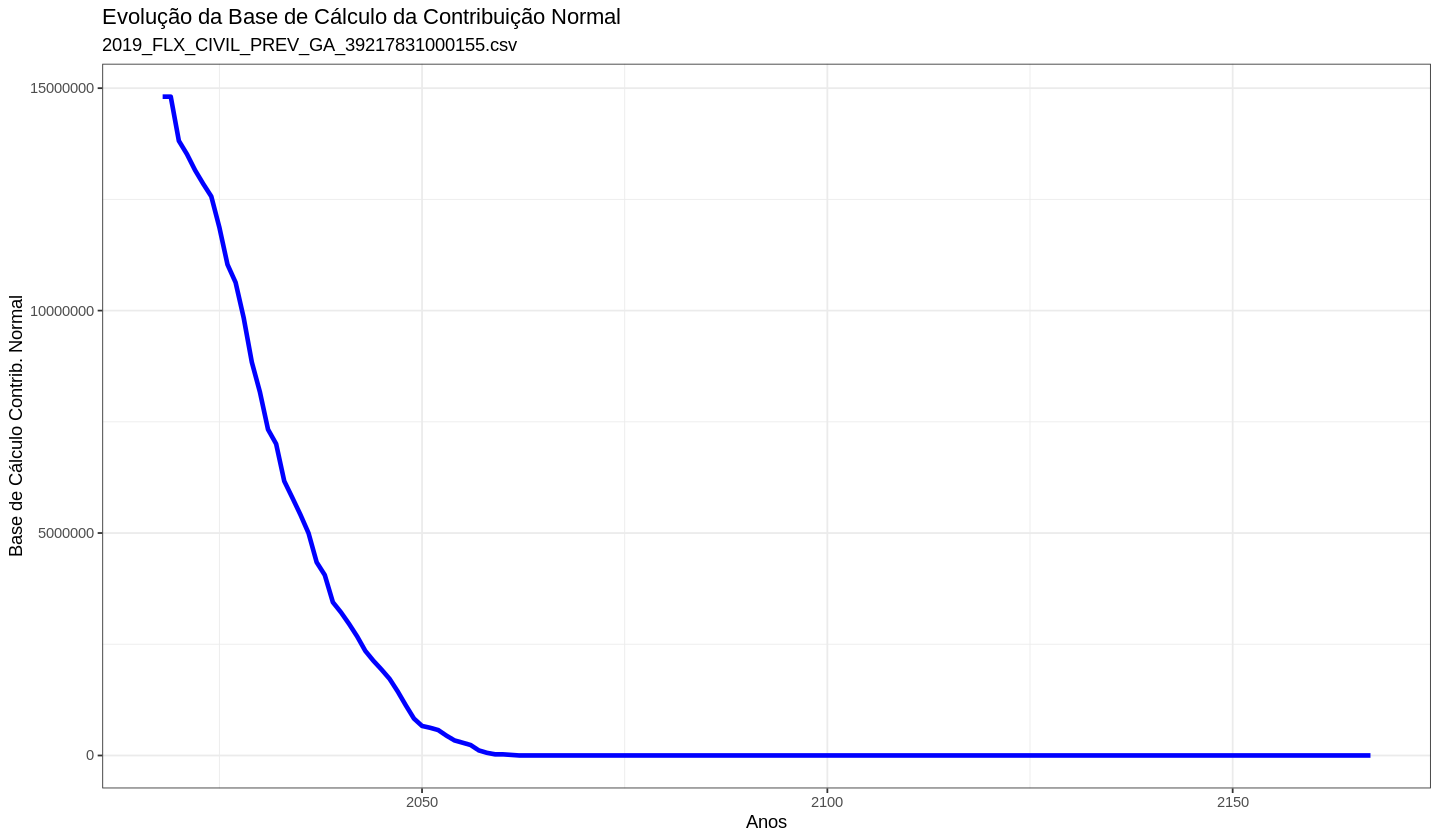

In [0]:
flx_orig %>%
  ggplot(aes(x=V100201, y=V109001)) +
    geom_line(size=1.3, color="blue") +
    labs(title = "Evolução da Base de Cálculo da Contribuição Normal",
         subtitle = NOME_ARQUIVO,
         x = "Anos",
         y = "Base de Cálculo Contrib. Normal") +
    theme_bw()

<br>

## **Gráfico 2 - Despesas com os aposentados atuais**

Essa variável resulta da soma de 4 variáveis do fluxo:

* __V211001__ - Benefícios Concedidos - Encargos - Aposentadorias Programadas   
* __V212001__ - Benefícios Concedidos - Encargos - Aposentadorias Especiais de Professores   
* __V213001__ - Benefícios Concedidos - Encargos - Outras Aposentadorias Especiais   
* __V214001__ - Benefícios Concedidos - Encargos - Aposentadorias por Invalidez

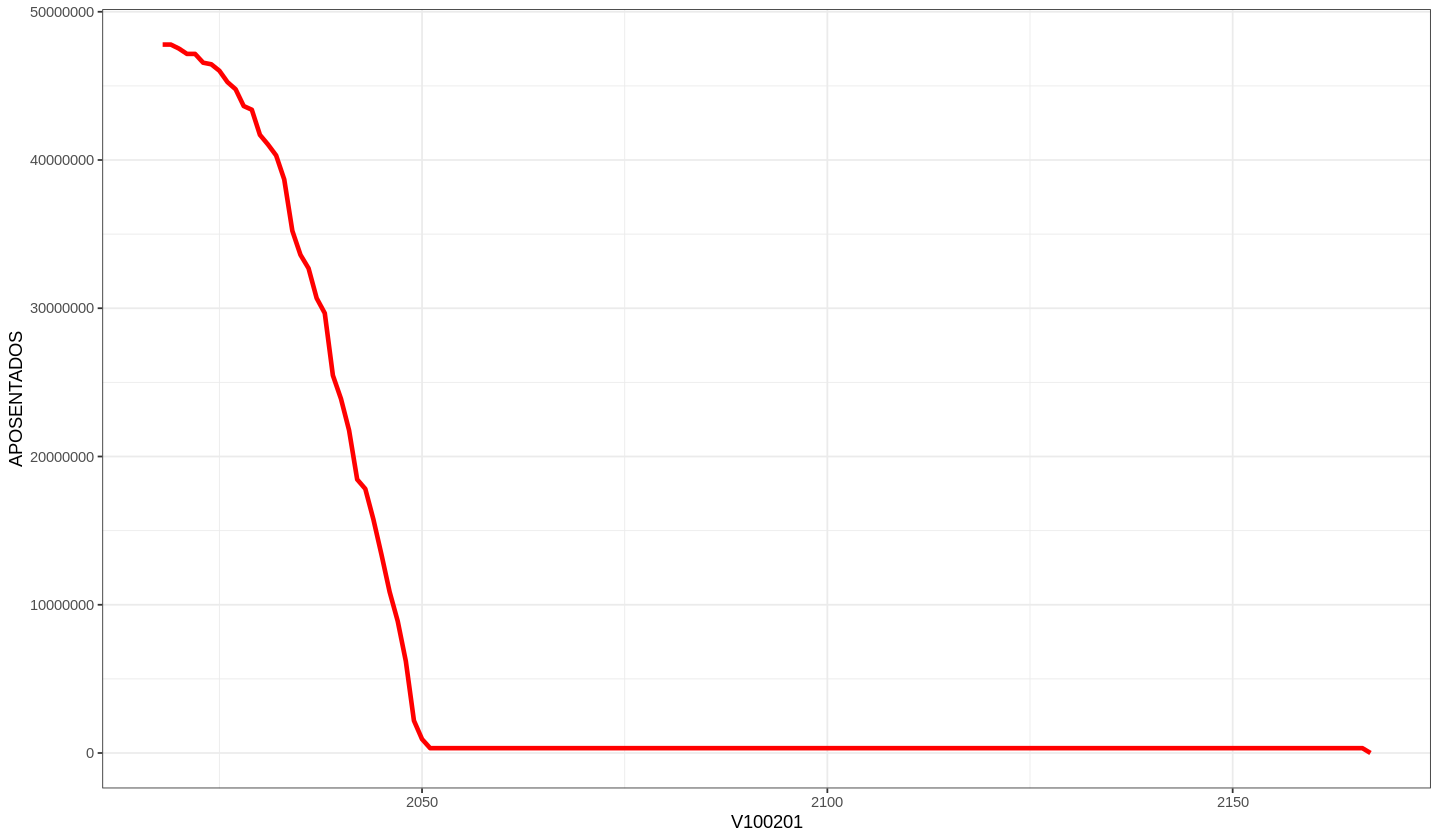

In [0]:
flx_orig %>%
    mutate(APOSENTADOS = V211001 + V212001 + V213001 + V214001) %>%
    ggplot(aes(x=V100201, y=APOSENTADOS)) + 
    geom_line(size=1.3, color="red") +
    labs(title = "Evolução das despesas com aposentados",
         subtitle = NOME_ARQUIVO,
         x = "Anos",
         y = "Despesas com aposentados") +
    theme_bw()

<br>

## **Gráfico 3 - Despesas com os pensionistas atuais**

Estes valores estão contidos na variável **V215001 - Benefícios Concedidos - Encargos - Pensões Por Morte**

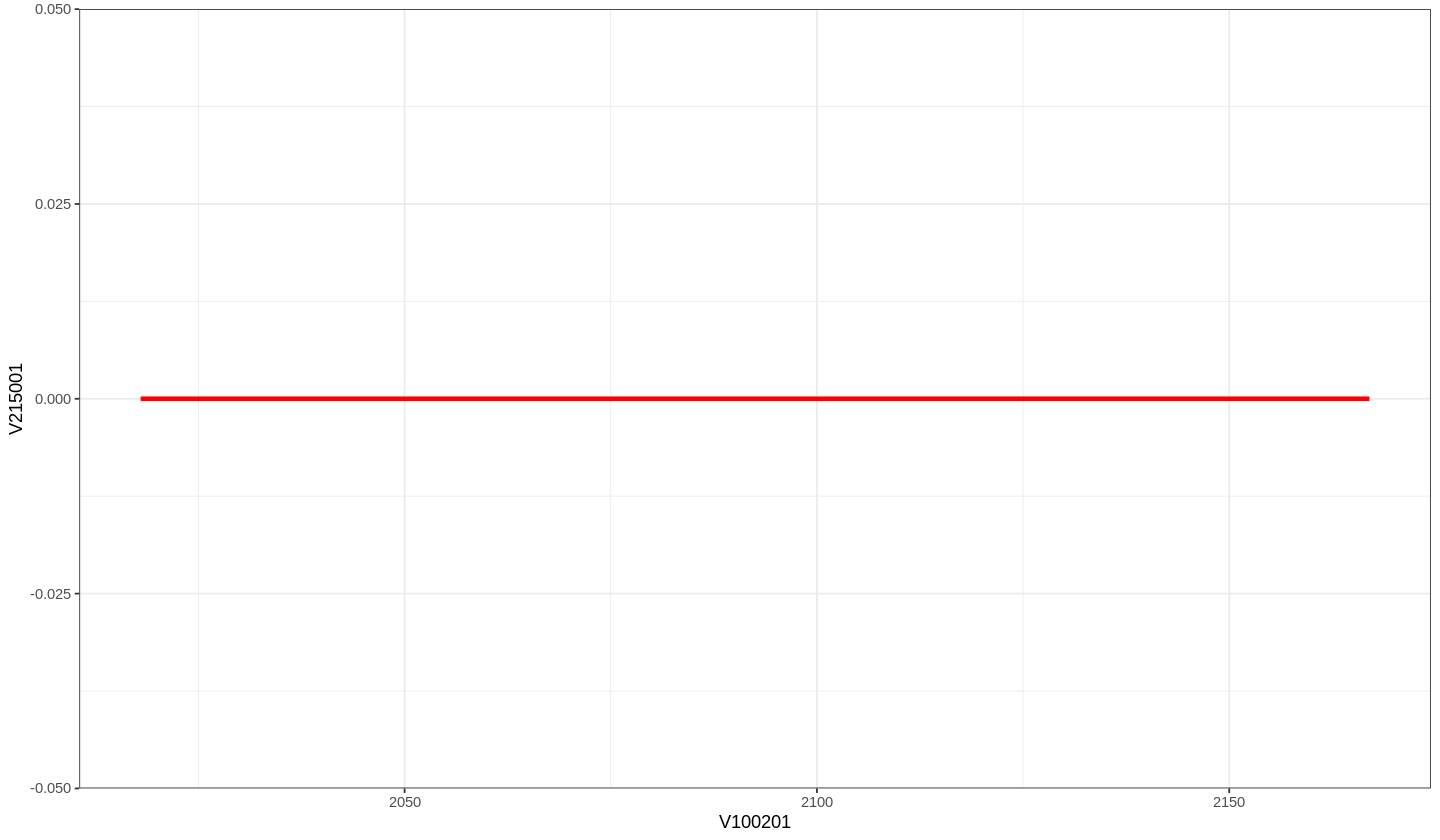

In [0]:
flx_orig %>%
  ggplot(aes(x=V100201, y=V215001)) +
    geom_line(size=1.3, color="red") +
    labs(title = "Evolução das despesas com pensionistas",
         subtitle = NOME_ARQUIVO,
         x = "Anos",
         y = "Despesas com pensionistas") +
    theme_bw()

<br>

## **Gráfico 4 - Despesas com os aposentados futuros**

Esta variável é a soma de outras 4 variáveis:

* __V221000__ - Benefícios a Conceder - Encargos -  <u>Aposentadorias Programadas</u>
* __V222000__ - Benefícios a Conceder - Encargos -  <u>Aposentadorias Especiais de Professores</u>   
* __V223000__ - Benefícios a Conceder - Encargos -  <u>Outras Aposentadorias Especiais</u>   
* __V224000__ -  Benefícios a Conceder - Encargos -  <u>Aposentadorias por Invalidez</u>   

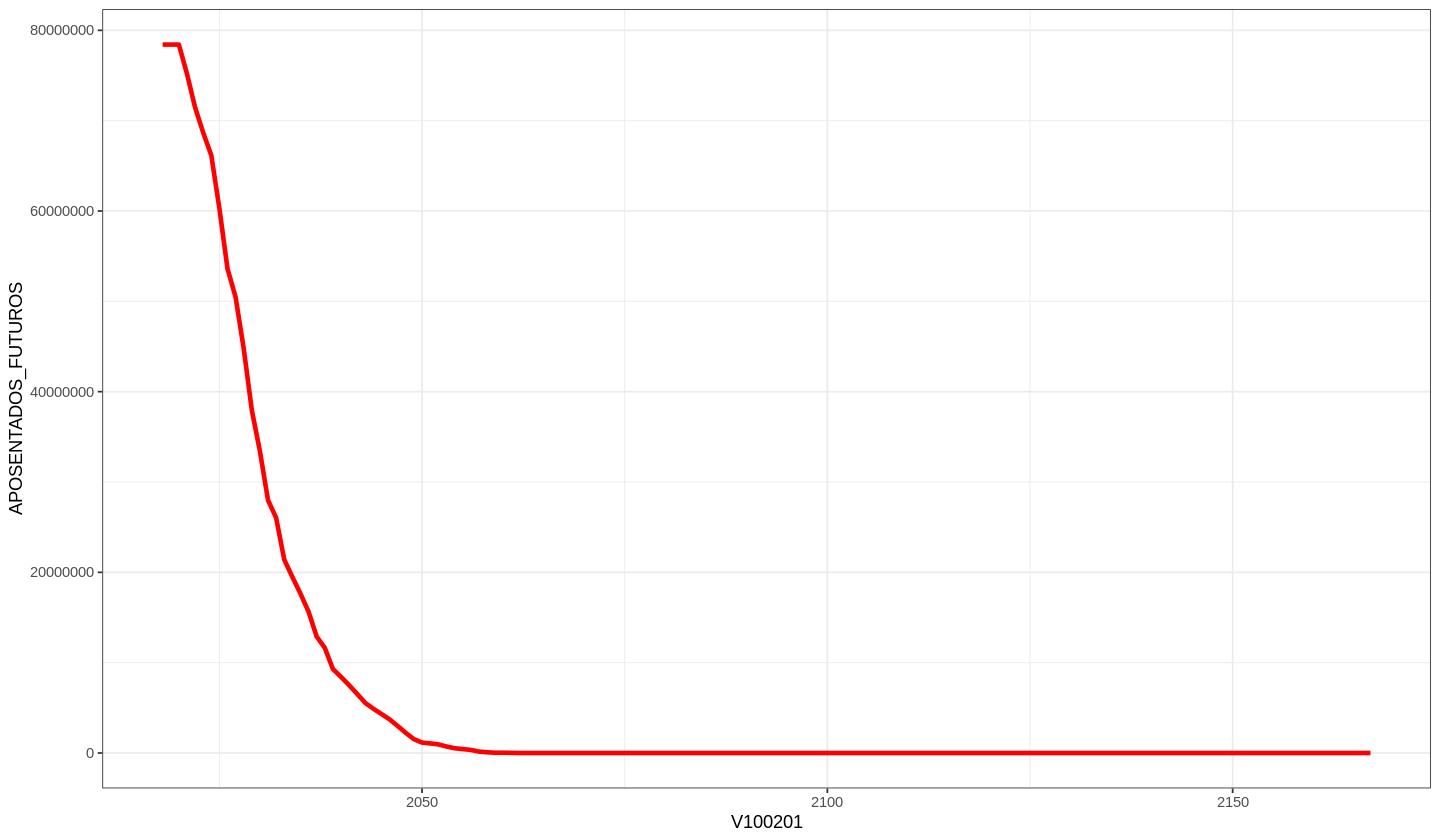

In [0]:
flx_orig %>%
  mutate(APOSENTADOS_FUTUROS = V221000 + V222000 + V223000 + V224000) %>%
  ggplot(aes(x=V100201, y=APOSENTADOS_FUTUROS)) +
    geom_line(size=1.3, color="red") +
    labs(title = "Evolução das despesas com aposentados",
         subtitle = NOME_ARQUIVO,
         x = "Anos",
         y = "Despesas com aposentados") +
    theme_bw()

<br>

## **Gráfico 5 - Despesas com os pensionistas futuros**

Esta variável é a soma de outras 2 variáveis:

* __V225000__ - Benefícios a Conceder - Encargos -  Pensões Por Morte de Servidores em Atividade   
* __V226000__ - Benefícios a Conceder - Encargos -  Pensões Por Morte de Aposentados   


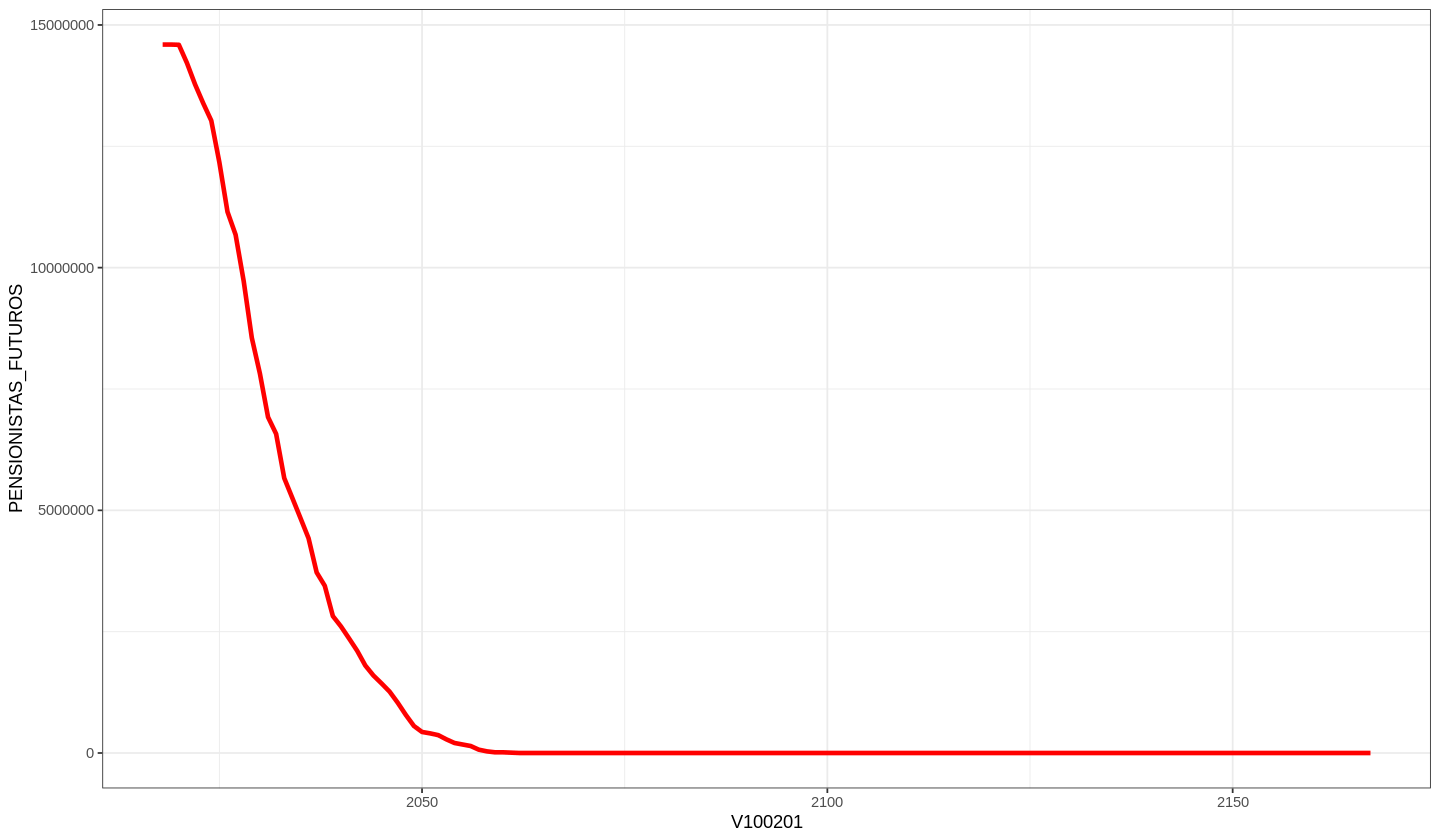

In [0]:
flx_orig %>%
  mutate(PENSIONISTAS_FUTUROS = V225000 + V226000) %>%
  ggplot(aes(x=V100201, y=PENSIONISTAS_FUTUROS)) +
    geom_line(size=1.3, color="red") +
    labs(title = "Evolução das despesas com pensionistas",
         subtitle = NOME_ARQUIVO,
         x = "Anos",
         y = "Despesas com pensionistas") +
    theme_bw()

<br>

## **Gráfico 6 - Receitas e Despesas Totais**

Vamos examinar o fluxo de receitas e despesas. Estas variáveis são, respectivamente, **V190000** e **V240000**. 

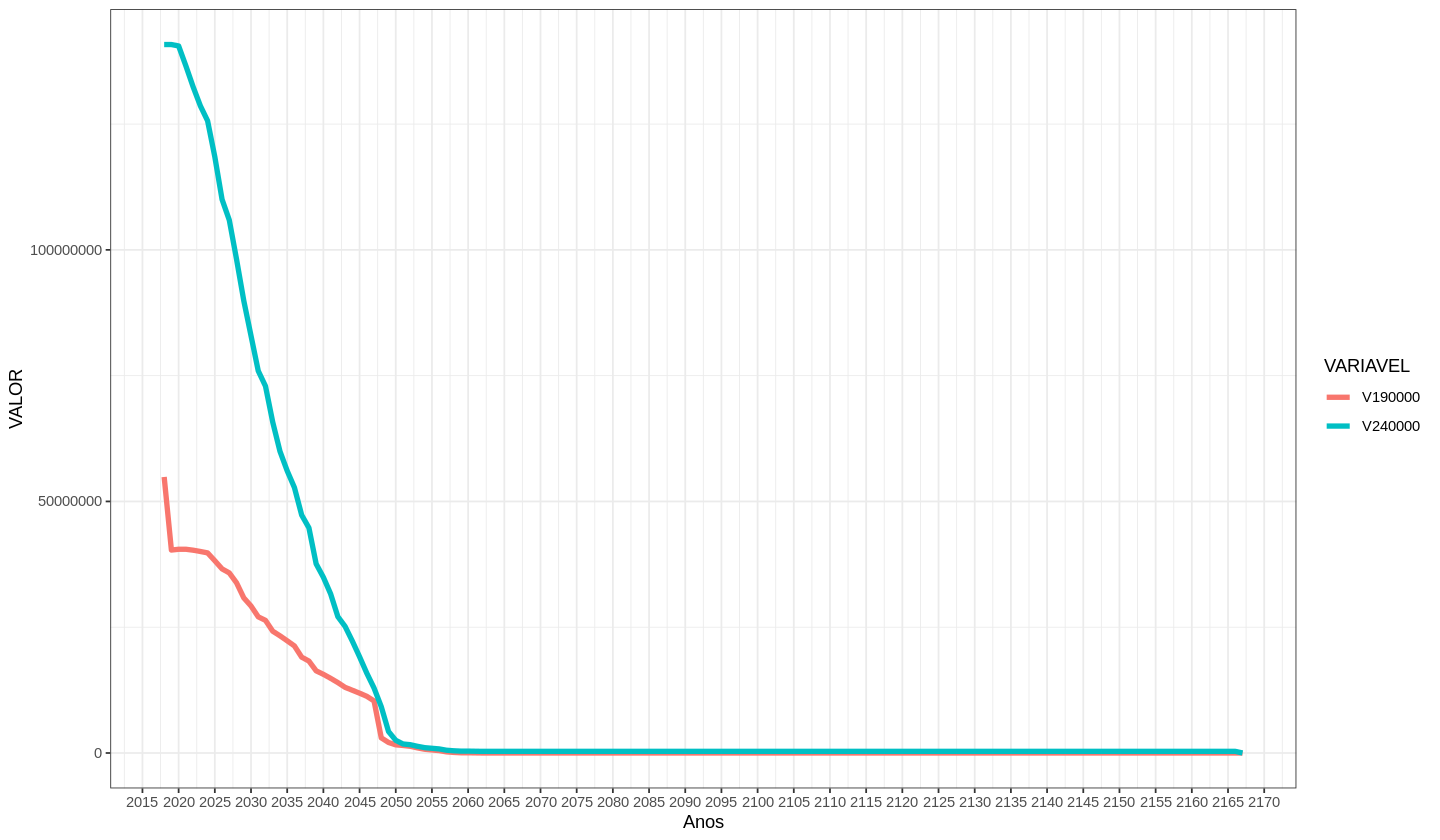

In [0]:
# Colocar as duas curvas no mesmo gráfico.
flx_orig %>%
    select(V100201, V190000, V240000) %>%
    pivot_longer(-V100201, names_to="VARIAVEL", values_to = "VALOR") %>%
    ggplot(aes(x=ymd(V100201, truncated=2L), y=VALOR, color=VARIAVEL)) +
      geom_line(size=1.5) +
      labs(title = "Evolução das Receitas e Despesas Totais",
         subtitle = NOME_ARQUIVO,
         x = "Anos",
         y = "Base de Cálculo Contrib. Normal")
      scale_x_date(date_breaks="5 year", date_labels = "%Y") + 
      theme_bw()


<br>

Com base nos códigos mostrados para a construção dos gráficos acima o usuário poderá criar o gráfico de outras variáveis do fluxo atuarial.

Por exemplo, como seria o gráfico da variável **V122000 - Benefícios a Conceder - Contribuições dos Segurados Ativos**?

Boa sorte!

In [0]:
# Insira seu código aqui!


<br>

<br>

---

# **PARTE II - CONFERÊNCIA DAS LINHAS DE CONTROLE DO FLUXO ATUARIAL**

---

<br>


Como já mencionado anteriormente, o fluxo atuarial possui duas linhas totalizadoras denominadas **Totais de Controle** e **Totais de Controle a Valor Atual**.

Nesta parte nosso objetivo é comparar estas linhas conforme apresentadas no fluxo atuarial original, com elas mesmas após termos realizado o recálculo de algumas variáveis. O objetivo deste teste é verificar possíveis inconsistências nos dados.

Vamos criar a seguir uma pequena função para calcular o fator de desconto (variável **V100401**) a partir das taxas de juros (variável **V100301**) informadas no fluxo atuarial.

Além disso, vamos identificar se o fluxo é antecipado ou postecipado e o ano de início do fluxo.

In [0]:
# Define uma função auxiliar para calcular as taxas de desconto

calcula_tx_desconto <- function(i, postecipado = TRUE){
  # i: Valor informado na variável V100301 - Taxa de Juros (%)
  if(postecipado){
    desconto <- 1 / (1 + i)
  } else {
    desconto <- c(1, 1 / (1 + i[2:length(i)])) 
  }
  round(cumprod(desconto), 5)
}

# Identifica se o fluxo é postecipado ou não.
postecipado <- ifelse(flx_orig$V100101[1] == 1, TRUE, FALSE)

# Obtém o ano do fluxo (ano inicial do fluxo...)
ano <- flx_orig$V100201[1]

Olhando a planilha modelo podemos perceber que algumas variáveis são resultado da soma de outras variáveis. Por exemplo, a variável V111000 é resultado da soma das variáveis V111101, V111201, V111301 e V111401. O mesmo ocorre com outras variáveis.

Assim, vamos fazer o recálculo de algumas variáveis, da mesma forma como é feito na planilha modelo, para posteriormente comparar esses novos valores com os valores apresentados no fluxo original.

In [0]:
# Recálculo de algumas variáveis...
flx_orig <- mutate(flx_orig,
                  
                  # fator de desconto
                  V100401 = calcula_tx_desconto(i = flx_orig$V100301 / 100, postecipado = postecipado), 
                  
                  # Benefícios Concedidos - Contribuições dos Aposentados
                  V111000 = V111101 + V111201 + V111301 + V111401 ,
                  
                  # Benefícios a Conceder - Contribuições do Ente
                  V121000 = V121100 + V121200 + V121300 + V121400 + V121500 + V121600 + V121700,
                  
                  # Benefícios a Conceder - Contribuições dos Segurados Ativos
                  V122000 = V122100 + V122200 + V122300 + V122400 + V122500 + V122600 + V122700,
                  
                  # Benefícios a Conceder - Contribuições dos Aposentados
                  V123000 = V123100 + V123200 + V123300 + V123400,
                  
                  # Benefícios a Conceder - Contribuição dos Pensionistas
                  V124000 = V124100 + V124200 + V124300 + V124400 + V124500,
                  
                  # Total das Receitas com Contribuições e Compensação Previdenciária
                  V190000 = V111000 + V112000 + V119900 + V121000 + V122000 + V123000 + V124000 + V129000 + V130101 + V130201 + V139901,
                  
                  # Benefícios Concedidos - Encargos
                  V210000 = V211001 + V212001 + V213001 + V214001 + V215001 + V219901,
                  
                  # Benefícios a Conceder - Encargos
                  V220000 = V221000 + V222000 + V223000 + V224000 + V225000 + V226000 + V227000 + V229000 + V239901,
                  
                  # Total das Despesas com Benefícios do Plano
                  V240000 = V210000 + V220000,
                  
                  # Insuficiência ou Excedente Financeiro
                  V250001 = V190000 - V240000)

Feito o recálculo de algumas das variáveis do fluxo, já estamos em condições de comparar as linhas de controle do fluxo original, armazenadas na variável `linhas_controle` com os totais obtidos a partir do recálculo de algumas variáveis do fluxo.


Para tanto vamos definir um vetor com as variáveis que serão objeto de conferência com o fluxo original e posteriormente, com os valores incluídos no DRAA.

In [0]:
# Codigos a serem conferidos:
codigos <- c("V109001", "V111000", "V111101", "V111201", "V111301", "V111401", "V112000",
             "V119900", "V121000", "V121100", "V121200", "V121300", "V121400", "V121500",
             "V121600", "V121700", "V122000", "V122100", "V122200", "V122300", "V122400",
             "V122500", "V122600", "V122700", "V123000", "V123100", "V123200", "V123300",
             "V123400", "V124000", "V124100", "V124200", "V124300", "V124400", "V124500",
             "V129000", "V130101", "V130201", "V139901", "V190000", "V210000", "V211001",
             "V212001", "V213001", "V214001", "V215001", "V219901", "V220000", "V221000",
             "V222000", "V223000", "V224000", "V225000", "V226000", "V227000", "V229000",
             "V239901", "V240000", "V250001")

Definidas as varáveis do fluxo atuarial que serão objeto de verificação, o passo a seguir é calcular as duas linhas de controle a partir dos dados **recalculados** do fluxo atuarial. Estes valores não devem divergir dos que constam da variável `linhas_controle`. 

In [0]:
# Função para o cálculo do valor presente das variáveis
vp <- function(x) sum(x * flx_orig$V100401, na.rm = TRUE)


total_flxrecalc <- flx_orig %>%
                      select(codigos) %>%
                      map_dbl(sum, na.rm=TRUE) 

total_flxrecalc_vp <- flx_orig %>%
                        select(codigos) %>%
                        map_dbl(vp)

controle_flxrecalc <- bind_rows(total_flxrecalc,
                                total_flxrecalc_vp)

controle_flxrecalc

V109001,V111000,V111101,V111201,V111301,V111401,V112000,V119900,V121000,V121100,⋯,V222000,V223000,V224000,V225000,V226000,V227000,V229000,V239901,V240000,V250001
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
228223536,0,0,0,0,0,0,0,347320568,188043855,⋯,344491727,0,44733008,93128819,126508156,0,0,0,2312592138,-1500352895
140618287,0,0,0,0,0,0,0,210365687,110054298,⋯,251107050,0,27337243,55923318,83643384,0,0,0,1404877012,-933732726


Obtenção das variáveis de interesse contidas em `linhas_controle`

In [0]:
# Obtenção das variáveis de interesse na variável "linhas_controle"
controle_flxorigin <- as_tibble(linhas_controle[, codigos])
controle_flxorigin

V109001,V111000,V111101,V111201,V111301,V111401,V112000,V119900,V121000,V121100,⋯,V222000,V223000,V224000,V225000,V226000,V227000,V229000,V239901,V240000,V250001
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
228223536,0,0,0,0,0,0,0,347320568,188043855,⋯,344491727,0,44733008,93128819,126508156,0,0,0,2312592138,-1497344462
140617647,0,0,0,0,0,0,0,210364704,110053733,⋯,251106328,0,27337118,55923051,83643064,0,0,0,1404870448,-930720313


Agora podemos comparar as linhas de controle **declarada** e **calculada** para verificar se existem divergências.

Devemos notar que ainda não estamos comparando o fluxo atuarial como o DRAA. Apenas verificando se existe inconsistência no fluxo atuarial original.

Para tornar o resultado da análise mais compreensível, é interessante que a descrição das variáveis seja apresentada junto com os códigos. Para tanto vamos importar o dicionário de dados (`VariaveisFluxoAtuarial.csv`) obtido a partir do arquivo `2019_FLX_CIVIL_PREV_GA_cnpj - Com cálculo Duração.xlsx` disponibilizado na página da SPrev. 

O referido arquivo está armazenado no GitHub (https://github.com/marcosfs2006/rede-rpps) e pode ser importado como mostrado a seguir:

In [0]:
dicionario <- read_csv2("https://raw.githubusercontent.com/marcosfs2006/rede-rpps/master/VariaveisFluxoAtuarial.csv",
                         locale=locale(encoding="latin1"), col_types = cols())
dicionario <- dicionario %>%
                mutate(codigo = paste("V", codigo, sep=""))

head(dicionario)

ERROR: ignored

Agora precisamos reunir em um único data frame as linhas decontrole declaradas (`controle_fluxorigin`) com as recalculadas (`controle_flxrecalc`) e então juntar a este conjunto de dados os nomes das variáveis que estão contidas na variável `dicionario`. 


In [0]:
                # junta as duas bases de dados
controle_flx <- bind_rows(controle_flxorigin,
                          controle_flxrecalc) %>%
                
                # faz a transposição e converte para tibble
                t() %>%
                as_tibble(rownames=NA) %>%
                          
                # renomeia as colunas do data frame
                rename(soma_flxorigin    = V1,
                       soma_flxorigin_vp = V2,
                       soma_flxrecalc    = V3,
                       soma_flxrecalc_vp = V4) %>%
                
                # insere na base duas novas colunas: codigo e dif_vp
                mutate(codigo = rownames(.),
                       dif_vp = round(soma_flxorigin_vp - soma_flxrecalc_vp))

# Cria um novo data frame apenas com os linhas onde existe diferenças
controle_flx2 <- controle_flx %>%                
                
                # descarta os registros em que a diferença é nula
                filter(dif_vp != 0) %>%

                # junta à base os nomes das variáveis
                inner_join(dicionario, by="codigo") %>%

                # seleciona as colunas de interesse
                select(codigo, nome, soma_flxorigin_vp, soma_flxrecalc_vp, dif_vp)

controle_flx2

codigo,nome,soma_flxorigin_vp,soma_flxrecalc_vp,dif_vp
<chr>,<chr>,<dbl>,<dbl>,<dbl>
V109001,Base de Cálculo da Contribuição Normal,140617646.6,140618286.7,-640
V121000,Benefícios a Conceder - Contribuições do Ente,210364703.6,210365686.7,-983
V121100,Benefícios a Conceder - Contribuições Futuras do Ente - Aposentadorias Programadas,110053733.3,110054298.1,-565
V121200,Benefícios a Conceder - Contribuições Futuras do Ente - Aposentadorias Especiais de Professores,51628914.2,51629077.4,-163
V121400,Benefícios a Conceder - Contribuições Futuras do Ente - Aposentadorias por Invalidez,8648835.6,8648883.2,-48
V121500,Benefícios a Conceder - Contribuições Futuras do Ente - Pensões Por Morte de Servidores em Atividade,18222853.1,18222956.9,-104
V121600,Benefícios a Conceder - Contribuições Futuras do Ente - Pensões Por Morte de Aposentados,21810367.4,21810471.2,-104
V122000,Benefícios a Conceder - Contribuições dos Segurados Ativos,146262719.4,146263402.9,-684
V122100,Benefícios a Conceder - Contribuições Futuras dos Segurados Ativos - Aposentadorias Programadas,76518341.9,76518734.6,-393


O resultado evidencia as variáveis para as quais foram identificadas divergências entre os fluxos declarado e recalculado.

Cabe ao analista avaliar se as divergências são significativas.

<br>

<br>

---

# **PARTE III - CONFERÊNCIA DO FLUXO ATUARIAL COM DADOS DO DRAA**

---

<br>

Feita a comparação das linhas de controle originais com as calculadas, passamos agora à comparação do fluxo atuarial com o DRAA.

Para que seja possível comparar o  fluxo atuarial com o DRAA será necessário juntar os dados do DRAA com os dados do fluxo atuarial "conferido" e o "declarado".

Estamos denominando de fluxo atuarial "conferido" o valor atual das variáveis do fluxo atuarial após os recalculos efetuados.

Já o fluxo atuarial "declarado" consiste no valor atual do fluxo constante do fluxo original e que guardamos na variável `linhas_controle`.





Os dados apresentados no fluxo atuarial devem guardar correspondência com os dados apresentados no DRAA. 

Assim, nesse tópico, nosso objetivo é comparar os valores apresentados no fluxo atuarial com os apresentados no DRAA.

Os dados do DRAA serão obtidos do arquivo `Valores_Compromissos.csv` disponibilizado pela SPrev.

A seguir faremos a importação da base de dados e seleção dos registros relativos ao Ente e ano a que se refere o fluxo atuarial objeto de nossa análise.


In [0]:
# Importação da base de dados
draa <- read_csv2("/content/Valores_Compromissos.csv", na="NULL", col_types = cols())

# Redefinição dos  nomes das variáveis
names(draa) <- c("cnpj", "uf", "ente", "ano", "dt_envio", "situacao_draa",
                    "tipo_plano", "tipo_massa", "codigo", "descr", "categoria",
                    "vlr_geracao_atual", "vlr_geracao_futura")


Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  CNPJ = col_character(),
  UF = col_character(),
  Ente = col_character(),
  Exercício = col_double(),
  `Data de Envio` = col_character(),
  `Situação do DRAA` = col_character(),
  `Tipo de Plano` = col_character(),
  `Tipo de Massa` = col_character(),
  `Código Dem.  Result. Atuarial` = col_double(),
  Descrição = col_character(),
  Categoria = col_character(),
  `Valor da Geração Atual` = col_double(),
  `Valor da Geração Futura` = col_double()
)



In [0]:
head(draa)

cnpj,uf,ente,ano,dt_envio,situacao_draa,tipo_plano,tipo_massa,codigo,descr,categoria,vlr_geracao_atual,vlr_geracao_futura
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
63606479000124,AC,Governo do Estado do Acre,2017,2017-09-27 10:42:00.527,Documentos Digitalizados,Previdenciário,Civil,109001,Valor Atual dos Salários Futuros,Resultado,8709902118,16057957503
63606479000124,AC,Governo do Estado do Acre,2017,2017-09-27 10:42:00.527,Documentos Digitalizados,Previdenciário,Civil,500000,ATIVOS GARANTIDORES DOS COMPROMISSOS DO PLANO DE BENEFÍCIOS,Título,13107752,NA
63606479000124,AC,Governo do Estado do Acre,2017,2017-09-27 10:42:00.527,Documentos Digitalizados,Previdenciário,Civil,500101,Aplicações em Segmento de Renda Fixa - RPPS,Resultado,11175305,NA
63606479000124,AC,Governo do Estado do Acre,2017,2017-09-27 10:42:00.527,Documentos Digitalizados,Previdenciário,Civil,500201,Aplicações em Segmento de Renda Variável - RPPS,Resultado,0,NA
63606479000124,AC,Governo do Estado do Acre,2017,2017-09-27 10:42:00.527,Documentos Digitalizados,Previdenciário,Civil,500301,Aplicações em Segmento Imobiliário - RPPS,Resultado,1932447,NA
63606479000124,AC,Governo do Estado do Acre,2017,2017-09-27 10:42:00.527,Documentos Digitalizados,Previdenciário,Civil,500401,Aplicações em Enquadramento - RPPS,Resultado,0,NA


Para a UF e ano escolhidos, o código a seguir indica se os dados estão na base do DRAA. Se o resultado for `TRUE` será possivel prosseguir na análise, se `FALSE` não será possível prosseguir.

In [0]:
is.element(ENTE,
   draa %>% 
    filter(uf == UF, ano == ANO_DRAA) %>%
    select(ente) %>%
    unique()
)

[1] FALSE

Como a base de dados contém informação de todos os RPPS, será necessário extrair os dados relativos ao Ente e do exercício cujo DRAA desejamos comparar com o fluxo.

In [0]:
draa_ente <- draa %>% 
                filter(uf == UF,
                       ano == ANO_DRAA,
                       ente == ENTE,
                       tipo_plano == "Previdenciário",
                       tipo_massa == "Civil",
                       grepl("^[123]", codigo)) %>%
                select(codigo, descr, vlr_geracao_atual) %>%
                arrange(codigo) %>%
                mutate(codigo = paste("V", codigo, sep=""))

# Confere se o filtro funcionou.
head(draa_ente)

codigo,descr,vlr_geracao_atual
<chr>,<chr>,<dbl>


Agora vamos juntar a base com os dados do DRAA (`draa_ente`) com a base contendo os dados do fluxo atuarial (`controle_flx`)

In [0]:
draa_ente2 <- draa_ente %>%
              inner_join(controle_flx, by="codigo") %>%
              select(codigo, descr, vlr_geracao_atual, soma_flxorigin_vp, soma_flxrecalc_vp) %>%
              mutate(dif_draa_flxorigin = round(vlr_geracao_atual - soma_flxorigin_vp),
                     dif_draa_flxrecalc = round(vlr_geracao_atual - soma_flxrecalc_vp))

draa_ente2

codigo,descr,vlr_geracao_atual,soma_flxorigin_vp,soma_flxrecalc_vp,dif_draa_flxorigin,dif_draa_flxrecalc
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


<br>

---

# **PARTE IV - ANÁLISE DE TENDÊNCIAS DE DADOS DO DRAA**

---

<br>

Nesta parte nosso objetivo é avaliar a tendência de variáveis do DRAA ao longo dos anos. 

A ideia é verificar a existência de comportamentos discrepantes que possam indicar algum tipo de manipulação das avaliações atuariais ao longo dos anos.

In [0]:
## Consistência ao longo dos anos
dd <- draa %>%
  filter(uf == UF,
         ente == ENTE,
         tipo_plano == "Previdenciário",
         tipo_massa == "Civil",
         grepl("^[123]", codigo)) %>%
  select(codigo, descr, vlr_geracao_atual, ano) %>%
  arrange(codigo) 

head(dd)

codigo,descr,vlr_geracao_atual,ano
<dbl>,<chr>,<dbl>,<dbl>
109001,Valor Atual dos Salários Futuros,118091354,2017
109001,Valor Atual dos Salários Futuros,133660696,2018
109001,Valor Atual dos Salários Futuros,0,2015
109001,Valor Atual dos Salários Futuros,83907109,2016
110000,VALOR ATUAL DAS CONTRIBUIÇÕES FUTURAS E COMPENSAÇÕES A RECEBER - BENEFÍCIOS CONCEDIDOS,0,2017
110000,VALOR ATUAL DAS CONTRIBUIÇÕES FUTURAS E COMPENSAÇÕES A RECEBER - BENEFÍCIOS CONCEDIDOS,0,2018


Agora podemos fazer gráficos para visualizar a evolução da variável que quisermos.

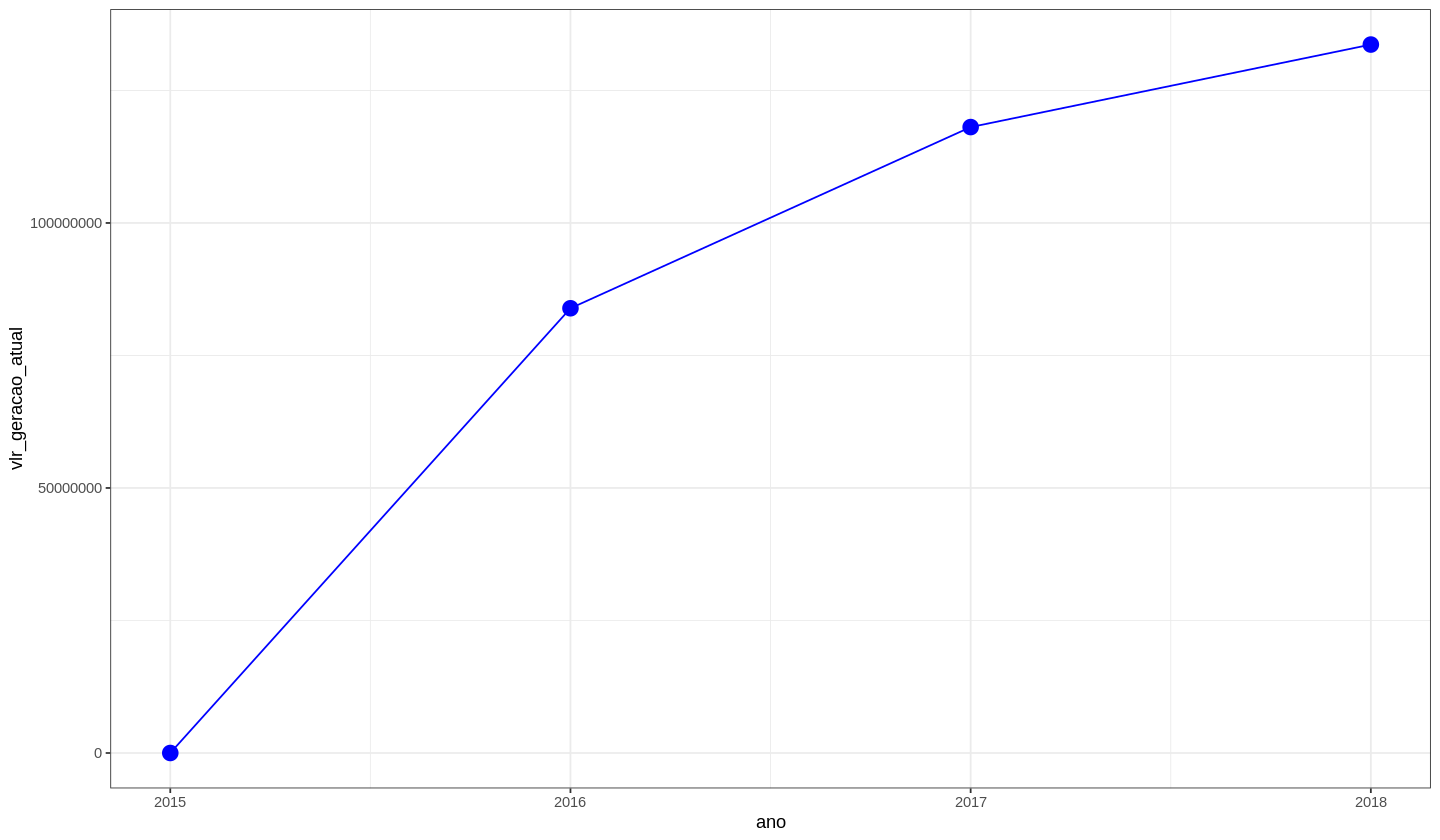

In [0]:
# Indique a variável de interesse...
variavel <- "109001" # Valor Atual dos Salários Futuros

dd %>%
  filter(grepl("^109001", codigo)) %>%
  arrange(ano) %>%
  ggplot(aes(x=ano, y=vlr_geracao_atual)) +
    geom_point(size=4, color="blue") +
    geom_line(color="blue") +
    theme_bw()